# Esercizio 3

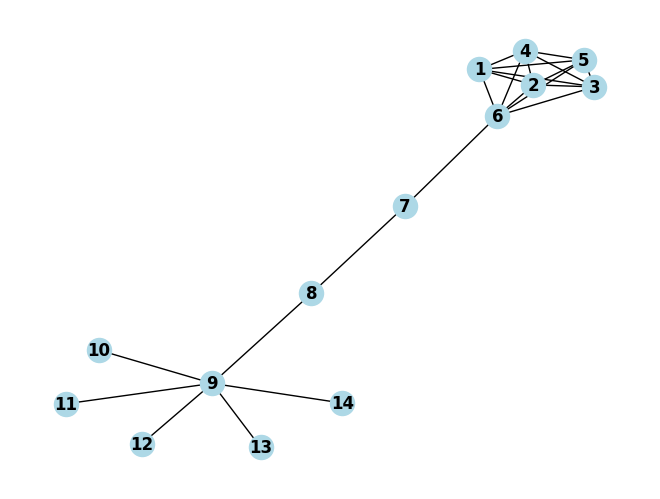

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph() #grafo non orientato
edges = [
    (1, 2), (1, 3), (1, 4), (1, 5), (1, 6),
    (2, 3), (2, 4), (2, 5), (2, 6), 
    (3, 4), (3, 5), (3, 6),
    (4, 5), (4, 6), (5, 6),
    (6, 7), (7, 8), (8, 9), (9, 10), (9, 11), 
    (9, 12), (9, 13), (9, 14)
]
G.add_edges_from(edges) #aggiungo gli archi e i nodi al grafo
#Disegno per controllare
nx.draw(G, with_labels=True, node_color='lightblue', node_size=300, font_weight='bold')
plt.show()

## Punto a

In [3]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality}")

Node 1: 0.38461538461538464
Node 2: 0.38461538461538464
Node 3: 0.38461538461538464
Node 4: 0.38461538461538464
Node 5: 0.38461538461538464
Node 6: 0.46153846153846156
Node 7: 0.15384615384615385
Node 8: 0.15384615384615385
Node 9: 0.46153846153846156
Node 10: 0.07692307692307693
Node 11: 0.07692307692307693
Node 12: 0.07692307692307693
Node 13: 0.07692307692307693
Node 14: 0.07692307692307693


I nodi con piu collegamenti rispetto agli altri sono considerati centrali e di conseguenza avranno valori piu alti

In [4]:
# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: {centrality}")

Node 1: 0.404208042495086
Node 2: 0.404208042495086
Node 3: 0.404208042495086
Node 4: 0.404208042495086
Node 5: 0.404208042495086
Node 6: 0.4185766681354634
Node 7: 0.08672190464962151
Node 8: 0.018113426010031138
Node 9: 0.004484156952836004
Node 10: 0.0008913128082836684
Node 11: 0.0008913128082836684
Node 12: 0.0008913128082836684
Node 13: 0.0008913128082836684
Node 14: 0.0008913128082836684


Oltre ai collegamenti si tiene conto di chi sono i suoi vicini (di un nodo)

In [95]:
# Invariant Distribution Centrality 
adj_matrix = nx.adjacency_matrix(G).todense()
identity_matrix=np.eye(len(G.nodes), dtype=int)
sum_rows = np.sum(adj_matrix,1)
P = adj_matrix / sum_rows[:,np.newaxis]  
P_final=np.zeros((len(G.nodes),len(G.nodes)))
for i in range(len(G.nodes)):
    for j in range(len(G.nodes)):
        if i==j:
            P_final[i][j]=1-P[i][j]
        else:
            P_final[i][j]=-1*P[j][i]
A=np.vstack([P_final,np.ones(len(G.nodes))])
b=np.append(np.zeros(len(G.nodes)),1)
invariant_distribution = np.linalg.lstsq(A, b, rcond=None)[0]
for node, centrality in enumerate(invariant_distribution):
    print(f"Node {node+1}: {centrality}")


Node 1: 0.10869565217391317
Node 2: 0.10869565217391344
Node 3: 0.10869565217391329
Node 4: 0.10869565217391333
Node 5: 0.10869565217391328
Node 6: 0.13043478260869593
Node 7: 0.043478260869565036
Node 8: 0.04347826086956503
Node 9: 0.1304347826086948
Node 10: 0.02173913043478244
Node 11: 0.02173913043478244
Node 12: 0.02173913043478244
Node 13: 0.02173913043478244
Node 14: 0.02173913043478244


## Punto b

In [54]:
# Katz Centrality
beta = 0.15
mu = np.ones(len(G.nodes), dtype=int)
lambda_max = np.max(np.linalg.eigvals(adj_matrix))
katz_centrality= np.linalg.inv(identity_matrix-(1-beta)/lambda_max*np.transpose(adj_matrix)).dot(beta*mu) 
for node, centrality in enumerate(katz_centrality):
    print(f"Node {node}: {centrality}")

Node 0: 1.0206631295376387
Node 1: 1.0206631295376387
Node 2: 1.0206631295376387
Node 3: 1.0206631295376387
Node 4: 1.0206631295376387
Node 5: 1.0753064318872172
Node 6: 0.37835967536666204
Node 7: 0.2775357770285273
Node 8: 0.37718432352031084
Node 9: 0.21366868885730977
Node 10: 0.21366868885730975
Node 11: 0.21366868885730972
Node 12: 0.21366868885730977
Node 13: 0.21366868885730975


## Punto c